# 주제: 인도 레스토랑 2023 

## 데이터 
kaggle의 인도 레스토랑 관련 데이터셋: https://www.kaggle.com/datasets/arnabchaki/indian-restaurants-2023  
 1.   Location  6593 non-null   object  
 2.   Locality  6593 non-null   object  
 3.   City      6593 non-null   object (도시)  
 4.   Cuisine   6593 non-null   object (요리종류)  
 5.   Rating    6593 non-null   float64 (평균평점)  
 6.   Votes     6593 non-null   int64 (리뷰수)   
 7.   Cost      6593 non-null   int64 (비용)   

## 목표
다중 입력, 다중 출력 모델 만들기  
도시, 요리종류, 리뷰수에 따른 평균평점, 비용 예측하는 모델  

## (1) 라이브러리 및 데이터 불러오기

In [77]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/aiffel/aiffel/project/first-repository/data/India_Restaurants/restaurants.csv')
df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost
0,Local,"Scindia House,Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Finger Food, Continental",4.1,2415,2000
1,The G.T. ROAD,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.3,2363,1500
2,Tamasha,"Connaught Place, Central Delhi",Central Delhi,Delhi,"Finger Food, North Indian, Italian, Contine...",4.2,5016,2000
3,The Junkyard Cafe,"Connaught Place, Central Delhi",Central Delhi,Delhi,"North Indian, Mediterranean, Asian, Italian...",4.2,2821,1800
4,Chili's American Grill and Bar,"M-Block,Connaught Place, Central Delhi",Central Delhi,Delhi,"Mexican, American, Italian",4.4,1094,2000


## (2) 데이터 전처리

- 데이터 확인하기

In [79]:
# Evaluating dataframe
print('* Size of dataframe: {}\n'.format(df.shape))
print('* Datatype of columns are:\n {}\n'.format(df.info()))

* Size of dataframe: (6593, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6593 entries, 0 to 6592
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      6593 non-null   object 
 1   Location  6593 non-null   object 
 2   Locality  6593 non-null   object 
 3   City      6593 non-null   object 
 4   Cuisine   6593 non-null   object 
 5   Rating    6593 non-null   float64
 6   Votes     6593 non-null   int64  
 7   Cost      6593 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 412.2+ KB
* Datatype of columns are:
 None



In [80]:
df.isnull().sum()

Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64

In [81]:
df.describe()

,Rating,Votes,Cost
count,6593.000000,6593.000000,6593.000000
mean,4.088200,119.420143,1102.798271
std,0.670031,261.849704,716.935212
min,1.000000,1.000000,100.000000
25%,3.900000,6.000000,500.000000
50%,4.200000,31.000000,900.000000
75%,4.400000,115.000000,1500.000000
max,5.000000,5016.000000,8000.000000


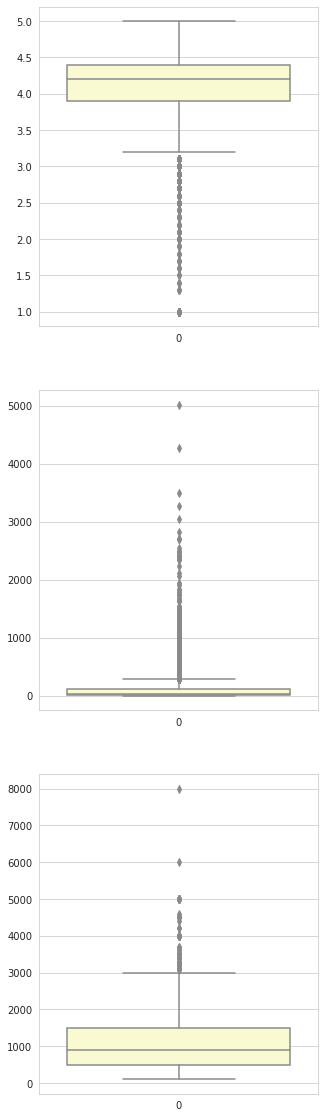

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(5, 20)

sns.boxplot(data = df['Rating'], ax=ax1, color = '#FFFFCC')
sns.boxplot(data = df['Votes'], ax=ax2, color = '#FFFFCC')
sns.boxplot(data = df['Cost'], ax=ax3, color = '#FFFFCC')
plt.show()

- 이상치 제거하기

In [83]:
#  Ratings, Votes, Cost Simplified Method (feat. IQR)
df_copy = df.copy()

for col in ['Rating', 'Votes', 'Cost']:
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3-Q1
    df_out = df_copy[(df_copy[col]<(Q1 - 1.5*IQR))| (df_copy[col]>(Q3 + 1.5*IQR))]
    df_copy = df_copy.drop(df_out.index, axis=0) 
df_copy = df_copy.reset_index(drop=True)

In [84]:
df_copy.describe()

,Rating,Votes,Cost
count,5338.000000,5338.000000,5338.000000
mean,4.226808,57.369052,1027.444736
std,0.405502,69.874926,616.223934
min,3.200000,1.000000,100.000000
25%,4.000000,7.000000,500.000000
50%,4.200000,27.000000,800.000000
75%,4.500000,80.750000,1400.000000
max,5.000000,306.000000,3000.000000


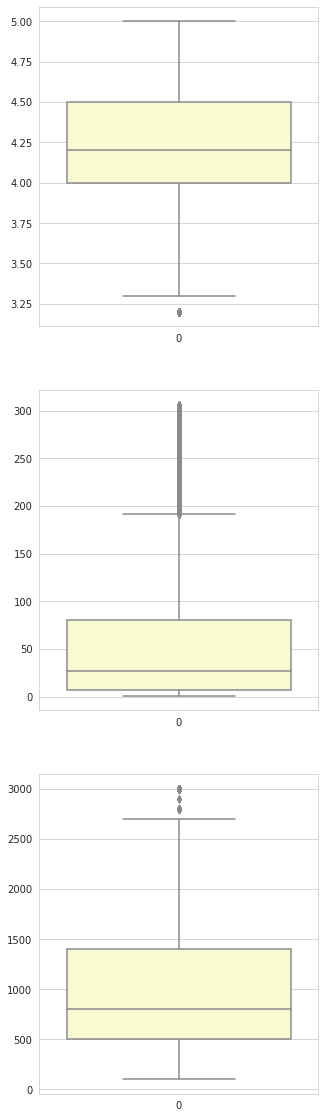

In [85]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(5, 20)

sns.boxplot(data = df_copy['Rating'], ax=ax1, color = '#FFFFCC')
sns.boxplot(data = df_copy['Votes'], ax=ax2, color = '#FFFFCC')
sns.boxplot(data = df_copy['Cost'], ax=ax3, color = '#FFFFCC')
plt.show()

- 문자열 원핫인코딩하기

In [91]:
print("City num: ",df['City'].value_counts().count())
df['City'].value_counts()

City num:  23


Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64

In [92]:
print("Cuisine num: ",df['Cuisine'].value_counts().count())
df['Cuisine'].value_counts()

Cuisine num:  2096


North Indian,  Chinese                                              294
Fast Food                                                           167
North Indian                                                        150
North Indian,  Chinese,  Continental                                146
North Indian,  Mughlai                                              128
                                                                   ... 
Bihari,  Seafood                                                      1
Japanese,  Asian,  Thai,  Korean                                      1
Italian,  Mexican,  Continental,  Street Food                         1
Multi-Cuisine,  North Indian,  Chinese,  Assamese                     1
Multi-Cuisine,  North Indian,  Continental,  Asian,  Health Food      1
Name: Cuisine, Length: 2096, dtype: int64

In [94]:
# 여러 원소로 구성되어 있는 값을 제일 첫 번째 문자열 하나만 남기기
# 첫 번째 문자열만 남기고 나머지 제거
df_copy['Cuisine'] = df_copy['Cuisine'].str.split(',').str[0]
print("Cuisine num: ",df_copy['Cuisine'].value_counts().count())
df_copy['Cuisine'].value_counts()

Cuisine num:  75


North Indian     1800
Fast Food         508
Multi-Cuisine     486
Italian           395
Desserts          309
                 ... 
Coastal             1
Malaysian           1
Singaporean         1
Sindhi              1
Sushi               1
Name: Cuisine, Length: 75, dtype: int64

In [97]:
# one-hot encoding
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체 생성
encoder = OneHotEncoder(sparse=False)

# City
# 정수형 라벨을 원핫 인코딩 수행
encoded_labels = encoder.fit_transform(df_copy[['City']])

# 인코딩된 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_labels, columns=['City_' + str(i) for i in range(encoded_labels.shape[1])])

# 원본 데이터프레임과 인코딩된 결과 데이터프레임 병합
merged_df = pd.concat([df_copy, encoded_df], axis=1)

# Cuisine
# 정수형 라벨을 원핫 인코딩 수행
encoded_labels = encoder.fit_transform(df_copy[['Cuisine']])

# 인코딩된 결과를 데이터프레임으로 변환
encoded_df = pd.DataFrame(encoded_labels, columns=['Cuisine' + str(i) for i in range(encoded_labels.shape[1])])

# 원본 데이터프레임과 인코딩된 결과 데이터프레임 병합
merged_df = pd.concat([merged_df, encoded_df], axis=1)

merged_df.head()

,Name,Location,Locality,City,Cuisine,Rating,Votes,Cost,City_0,City_1,...,Cuisine65,Cuisine66,Cuisine67,Cuisine68,Cuisine69,Cuisine70,Cuisine71,Cuisine72,Cuisine73,Cuisine74
0,Padmanabham,"Janpath, Central Delhi",Central Delhi,Delhi,South Indian,4.2,223,700,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sandoz,"Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,4.2,134,1500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,OTB Courtyard,"Connaught Place, Central Delhi",Central Delhi,Delhi,World Cuisine,4.1,297,2000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Castle Barbeque,"Connaught Place, Central Delhi",Central Delhi,Delhi,North Indian,3.5,101,2000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Connaught Clubhouse,"Janpath, Central Delhi",Central Delhi,Delhi,Multi-Cuisine,4.2,117,2500,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
print(merged_df.shape)

(5338, 106)


In [138]:
# 데이터 정제하기
city_data = merged_df.iloc[:, 8:31]
cuisine_data = merged_df.iloc[:, 31:]
rating_data = merged_df['Rating']
vote_data = merged_df['Votes']
cost_data = merged_df['Cost']

## (3) 훈련데이터 테스트데이터 분리하기

In [ ]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(, 
#                                                     , 
#                                                     test_size=0.2, 
#                                                     random_state=42)

In [ ]:
# #훈련데이터와 평가데이터의 shape 확인
# print('X_train shape: ', X_train.shape,', X_test shape: ', X_test.shape)
# print('y_train shape: ', y_train.shape,', y_test shape: ', y_test.shape)

## (4) 모델 구성하기

In [119]:
from tensorflow import keras
from tensorflow.keras import layers

# 도시, 요리종류, 리뷰수에 따른 평균평점, 비용 예측
city_size = df_copy['City'].value_counts().count()
cuisine_size = df_copy['Cuisine'].value_counts().count()
vote_size = 1

# Input이 3개
city = keras.Input(shape=(city_size,), name="city")
cuisine = keras.Input(shape=(cuisine_size,), name="cuisine")
vote = keras.Input(shape=(vote_size,), name="vote")

# Input을 합치고 Dense layer에 넣음
features = layers.Concatenate()([city, cuisine, vote])
features = layers.Dense(64, activation="relu")(features)

# output이 2개
ratings = layers.Dense(1, activation="sigmoid", name="ratings")(features)
cost = layers.Dense(1, activation="sigmoid", name="cost")(features)

model = keras.Model(inputs=[city, cuisine, vote], outputs=[ratings, cost])

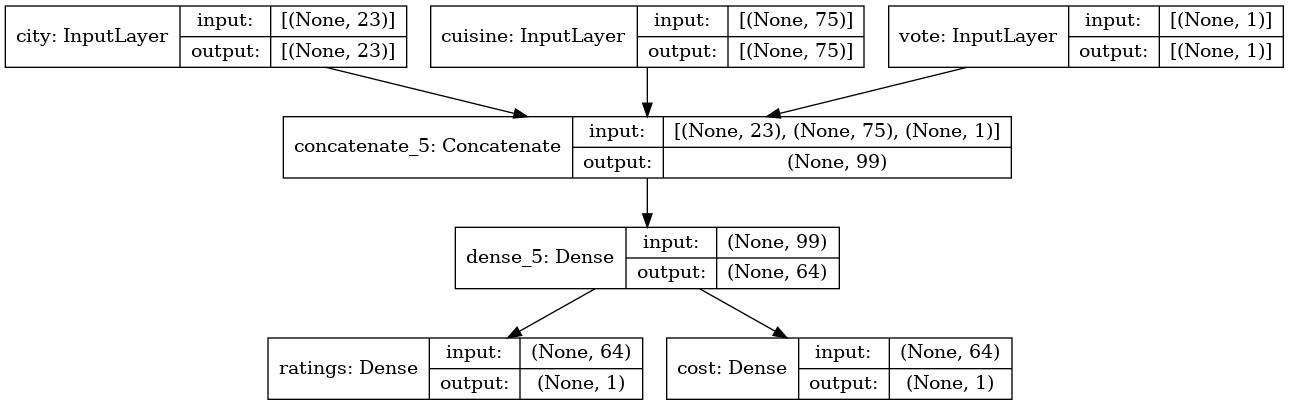

In [120]:
keras.utils.plot_model(model, show_shapes=True)

## (5) 모델 컴파일 및 학습시키기

In [141]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "mean_squared_error"],
              metrics=[["mean_absolute_error"], ["mean_absolute_error"]])

model.fit([city_data, cuisine_data, vote_data],
          [rating_data, cost_data], epochs=3)

Epoch 1/3
167/167 [==============================] - 1s 4ms/step - loss: 1433260.7500 - ratings_loss: 10.6055 - cost_loss: 1433250.8750 - ratings_mean_absolute_error: 3.2307 - cost_mean_absolute_error: 1026.4454
Epoch 2/3
167/167 [==============================] - 1s 4ms/step - loss: 1433260.5000 - ratings_loss: 10.5772 - cost_loss: 1433249.6250 - ratings_mean_absolute_error: 3.2269 - cost_mean_absolute_error: 1026.4447
Epoch 3/3
167/167 [==============================] - 1s 4ms/step - loss: 1433260.5000 - ratings_loss: 10.5767 - cost_loss: 1433249.7500 - ratings_mean_absolute_error: 3.2268 - cost_mean_absolute_error: 1026.4447


-> 결과 정리  
ratings_loss: 11.1619   
cost_loss: 1433351.6250  
ratings_mean_absolute_error: 3.3093  
cost_mean_absolute_error: 1026.5062  

## (6) 평가하기

In [140]:
model.evaluate([city_data, cuisine_data, vote_data],
               [rating_data, cost_data])
ratings_preds, cost_preds = model.predict([city_data, cuisine_data, vote_data])

167/167 [==============================] - 1s 2ms/step - loss: 1433266.5000 - ratings_loss: 10.7081 - cost_loss: 1433255.6250 - ratings_mean_absolute_error: 3.2449 - cost_mean_absolute_error: 1026.4489


-> 결과 정리(훈련때와비슷)  
ratings_loss: 10.7081  
cost_loss: 1433255.6250  
ratings_mean_absolute_error: 3.2449  
cost_mean_absolute_error: 1026.4489  

# 프로젝트 회고 

## 배운점

1. 다중입력, 다중출력을 시도해보았다.
2. 원핫인코딩한 data를 fit의 input에 어떻게 넣어야할지 몰랐는데 필요한 부분만 2차원 배열로 가져오면 된다는 잊고있던 사실을 다시 상기하였다. 
3. 잊고 있었던 결측치, 이상치 찾기, 특정 열 추출, IQR, 원핫인코딩 등의 데이터 전처리 작업들을 다시 상기할 수 있었던 좋은 시간이었다. 

## 아쉬운점

1. 정수형 인코딩으로도 시도해보고 싶다.
2. 목표가 좋은 성능을 나타낸 것이 아니어서 딱히 훈련데이터와 평가데이트를 나누지 않았는데 다음엔 나눠서 시도해야겠다. 

## 종합평가

원래 목표인 다중입력, 다중출력 시도해보기에 성공적으로 수행하였다. 새로운 시도를 해보기 위해 아쉬운점에 적어든 것들을 시도해도 좋을 것 같다. 결론: 카레 맛있다. 

# Refernce
1. https://www.kaggle.com/code/arnabchaki/comprehensive-eda-of-indian-restaurants  
2. https://www.kaggle.com/code/sivaneshansiva/indian-restaurants-eda  
3. https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model